##### About the dataset: The dataset contains information on cancer-related metrics across different countries, including factors like alcohol-attributable cancer deaths, smoking prevalence, infection-related cancers, radiotherapy availability, cervical cancer incidence rates, and HIV prevalence. 

##### Goal: Identify the key factors that most significantly predict the incidence of cervical cancer across countries using Linear Regression learning algorithm and Random forest regressor

##### Data Loading: Brief overview of the dataset and its properties

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#File path to the data  
file_path = 'Cancer (1).xlsx'

# Storing the dataset into a variable
cancer = pd.read_excel(file_path)   

# Reading the first few rows of the dataset
cancer.head()

,Country or Territory,"Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016",Smoking prevalence male\nPrevalence (%) of daily smoking for men,Smoking prevalence female\nPrevalence (%) of daily smoking for women,"Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country","Obesity prevalence male\nInternational variation in the prevalence of obesity, 2016","Obesity prevalence female\nInternational variation in the prevalence of obesity, 2016","Melanoma skin cancer incidence\nAge-standardized rate (world) per 100,000, both sexes, 2018",Breastfeeding at 12 months\nPercent (%) of children who receive any breast milk at 12 months of age,Average births per woman\n2010-2015,...,"Most common cancer cases worldwide, females\n2018","Most common cancer deaths worldwide, females\n2018","Most common cancer cases worldwide, males\n2018","Most common cancer deaths worldwide, males\n2018","Cancer survivors\nEstimated number of cancer survivors diagnosed within the past five years per 100,000 population, both sexes, 2018","Years lived with disability due to cancer\nBoth sexes, all ages, 2017","Hepatitis B virus vaccination\nHepatitis B vaccination coverage (% of one-year-olds who have received three doses of hepatitis B vaccine), 2017","Radiotherapy availability\nNumber of radiotherapy machines per 1,000 cancer patients","Cervical cancer incidence rates\nAge-standardized rate (world) per 100,000, 2018","HIV prevalence (%)\nBoth sexes, 2017"
0,Afghanistan,0.5,21.4,7,16,3.2,7.6,0.3,88,5.3,...,Breast,Breast,"Lip, oral cavity",Stomach,151,8089.8,65,0,6.6,No data
1,Algeria,1.1,17.5,2.2,12.9,19.9,34.9,0.7,55.1,3,...,Breast,Breast,Lung,Lung,312.6,16404.9,91,0.75,8.1,0.05
2,Azerbaijan,3.2,36.7,0.3,15.4,15.8,23.6,0.53,36.1,2.1,...,Breast,Breast,Lung,Lung,228.1,6685.1,95,0.86,6.5,0.1
3,Albania,4.9,40.9,6.1,13.4,21.6,21.8,1.7,72.3,1.7,...,Breast,Breast,Lung,Lung,401.1,2644.3,99,0.6,6.5,0.05
4,Armenia,5,43.5,1.5,12.2,17.1,23,1.6,52.3,1.7,...,Breast,Breast,Lung,Lung,402.2,3418,94,0.34,8.4,0.2


In [2]:
# Reading the last 5 rows of the dataset
cancer.tail()

,Country or Territory,"Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016",Smoking prevalence male\nPrevalence (%) of daily smoking for men,Smoking prevalence female\nPrevalence (%) of daily smoking for women,"Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country","Obesity prevalence male\nInternational variation in the prevalence of obesity, 2016","Obesity prevalence female\nInternational variation in the prevalence of obesity, 2016","Melanoma skin cancer incidence\nAge-standardized rate (world) per 100,000, both sexes, 2018",Breastfeeding at 12 months\nPercent (%) of children who receive any breast milk at 12 months of age,Average births per woman\n2010-2015,...,"Most common cancer cases worldwide, females\n2018","Most common cancer deaths worldwide, females\n2018","Most common cancer cases worldwide, males\n2018","Most common cancer deaths worldwide, males\n2018","Cancer survivors\nEstimated number of cancer survivors diagnosed within the past five years per 100,000 population, both sexes, 2018","Years lived with disability due to cancer\nBoth sexes, all ages, 2017","Hepatitis B virus vaccination\nHepatitis B vaccination coverage (% of one-year-olds who have received three doses of hepatitis B vaccine), 2017","Radiotherapy availability\nNumber of radiotherapy machines per 1,000 cancer patients","Cervical cancer incidence rates\nAge-standardized rate (world) per 100,000, 2018","HIV prevalence (%)\nBoth sexes, 2017"
202,Réunion,No data,No data,No data,12.4,No data,No data,3.3,No data,2.4,...,Breast,Breast,Prostate,Lung,590.1,No data,No data,No data,10.5,No data
203,French Polynesia,No data,No data,No data,6.6,No data,No data,6.5,No data,2.1,...,Breast,Lung,Prostate,Lung,661.9,No data,No data,No data,10.1,No data
204,Guadeloupe,No data,No data,No data,10.2,No data,No data,1.5,No data,2,...,Breast,Breast,Prostate,Prostate,776.5,No data,No data,0.88,9.3,No data
205,Guam,No data,No data,No data,8.5,No data,No data,No data,No data,2.4,...,Breast,Lung,Lung,Lung,418,168.8,No data,2.58,18.7,No data
206,Martinique,No data,No data,No data,6.6,No data,No data,2,No data,2,...,Breast,Breast,Prostate,Prostate,747,No data,No data,1.46,7.6,No data


In [3]:
# Checking for the shape of the dataset
cancer.shape

(207, 27)

In [8]:
# checking for the columns in the dataset
cancer.columns

Index(['Country or Territory',
       'Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016',
       'Smoking prevalence male\nPrevalence (%) of daily smoking for men',
       'Smoking prevalence female\nPrevalence (%) of daily smoking for women',
       'Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country',
       'Obesity prevalence male\nInternational variation in the prevalence of obesity, 2016',
       'Obesity prevalence female\nInternational variation in the prevalence of obesity, 2016',
       'Melanoma skin cancer incidence\nAge-standardized rate (world) per 100,000, both sexes, 2018',
       'Breastfeeding at 12 months\nPercent (%) of children who receive any breast milk at 12 months of age',
       'Average births per woman\n2010-2015',
       'Outdoor air pollution\nAverage annual population-weighted concentrations of PM2.5 (particulate matter of

In [5]:
# Checking for the information of the dataset
cancer.info()   

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 27 columns):
 #   Column                                                                                                                                                     Non-Null Count  Dtype 
---  ------                                                                                                                                                     --------------  ----- 
 0   Country or Territory                                                                                                                                       207 non-null    object
 1   Cancer deaths attributable to alcohol
Proportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016                       207 non-null    object
 2   Smoking prevalence male
Prevalence (%) of daily smoking for men                                                                                            207

##### The dataset has 27 columns and 207 rows, It has 27 objecst as the data types and this indicates that all of them are either texts or they contain mixed data types in a single column and by looking at our dataset, it is clear that the columns contain mixed datatypes.

In [6]:
# Displaying all the column names of the dataset
from tabulate import tabulate
column_names = cancer.columns.tolist()
# Convert all the column names to a list
column_names_table = [[i+1, name] for i, name in enumerate(column_names)]
print(tabulate(column_names_table, headers=["Index", "Column Name"]))   


  Index  Column Name
-------  -----------------------------------------------------------------------------------------------------------------------------------
      1  Country or Territory
      2  Cancer deaths attributable to alcohol
         Proportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016
      3  Smoking prevalence male
         Prevalence (%) of daily smoking for men
      4  Smoking prevalence female
         Prevalence (%) of daily smoking for women
      5  Cancers attributable to infections
         Proportion of cancers attributable to infections (%), by country
      6  Obesity prevalence male
         International variation in the prevalence of obesity, 2016
      7  Obesity prevalence female
         International variation in the prevalence of obesity, 2016
      8  Melanoma skin cancer incidence
         Age-standardized rate (world) per 100,000, both sexes, 2018
      9  Breastfeeding at 12 months
         Percent (%) o

In [55]:
# Corrected list of selected columns
selected_columns = [
    'Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016',
    'Smoking prevalence male\nPrevalence (%) of daily smoking for men',
    'Smoking prevalence female\nPrevalence (%) of daily smoking for women',
    'Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country',
    'Radiotherapy availability\nNumber of radiotherapy machines per 1,000 cancer patients',
    'HIV prevalence (%)\nBoth sexes, 2017',
    'Cervical cancer incidence rates\nAge-standardized rate (world) per 100,000, 2018'  # Target column
]

# Select the relevant columns from the dataset
selected_data = cancer[selected_columns]
# Display the head of the selected columns
selected_data.head()


,"Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016",Smoking prevalence male\nPrevalence (%) of daily smoking for men,Smoking prevalence female\nPrevalence (%) of daily smoking for women,"Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country","Radiotherapy availability\nNumber of radiotherapy machines per 1,000 cancer patients","HIV prevalence (%)\nBoth sexes, 2017","Cervical cancer incidence rates\nAge-standardized rate (world) per 100,000, 2018"
0,0.5,21.4,7,16,0,No data,6.6
1,1.1,17.5,2.2,12.9,0.75,0.05,8.1
2,3.2,36.7,0.3,15.4,0.86,0.1,6.5
3,4.9,40.9,6.1,13.4,0.6,0.05,6.5
4,5,43.5,1.5,12.2,0.34,0.2,8.4


In [56]:
# Display the tail of the selected columns
selected_data.tail()

,"Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016",Smoking prevalence male\nPrevalence (%) of daily smoking for men,Smoking prevalence female\nPrevalence (%) of daily smoking for women,"Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country","Radiotherapy availability\nNumber of radiotherapy machines per 1,000 cancer patients","HIV prevalence (%)\nBoth sexes, 2017","Cervical cancer incidence rates\nAge-standardized rate (world) per 100,000, 2018"
202,No data,No data,No data,12.4,No data,No data,10.5
203,No data,No data,No data,6.6,No data,No data,10.1
204,No data,No data,No data,10.2,0.88,No data,9.3
205,No data,No data,No data,8.5,2.58,No data,18.7
206,No data,No data,No data,6.6,1.46,No data,7.6


In [57]:
# Checking for the shape of the selected data
selected_data.shape

(207, 7)

In [58]:
# Checking for missing values in the dataset
selected_data.isnull().sum()

Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016    0
Smoking prevalence male\nPrevalence (%) of daily smoking for men                                                                         0
Smoking prevalence female\nPrevalence (%) of daily smoking for women                                                                     0
Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country                                     0
Radiotherapy availability\nNumber of radiotherapy machines per 1,000 cancer patients                                                     0
HIV prevalence (%)\nBoth sexes, 2017                                                                                                     0
Cervical cancer incidence rates\nAge-standardized rate (world) per 100,000, 2018                                                         0
dtype: int64

##### There are no missing values in the dataset

In [59]:
# Checking for the data types of the selected data  
selected_data.dtypes

Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016    object
Smoking prevalence male\nPrevalence (%) of daily smoking for men                                                                         object
Smoking prevalence female\nPrevalence (%) of daily smoking for women                                                                     object
Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country                                     object
Radiotherapy availability\nNumber of radiotherapy machines per 1,000 cancer patients                                                     object
HIV prevalence (%)\nBoth sexes, 2017                                                                                                     object
Cervical cancer incidence rates\nAge-standardized rate (world) per 100,000, 2018                                                        

In [62]:
# Replace "No data" with NaN using .loc[] and .replace()
selected_data.loc[:,'HIV prevalence (%)\nBoth sexes, 2017'] = selected_data['HIV prevalence (%)\nBoth sexes, 2017'].replace('No data', np.nan)
selected_data.loc[:,'Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016'] = selected_data['Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016'].replace('No data', np.nan)
selected_data.loc[:,'Smoking prevalence male\nPrevalence (%) of daily smoking for men'] = selected_data['Smoking prevalence male\nPrevalence (%) of daily smoking for men'].replace('No data', np.nan)
selected_data.loc[:,'Smoking prevalence female\nPrevalence (%) of daily smoking for women'] = selected_data['Smoking prevalence female\nPrevalence (%) of daily smoking for women'].replace('No data', np.nan)
selected_data.loc[:,'Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country'] = selected_data['Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country'].replace('No data', np.nan)
selected_data.loc[:,'Radiotherapy availability\nNumber of radiotherapy machines per 1,000 cancer patients'] = selected_data['Radiotherapy availability\nNumber of radiotherapy machines per 1,000 cancer patients'].replace('No data', np.nan)
selected_data.loc[:,'Cervical cancer incidence rates\nAge-standardized rate (world) per 100,000, 2018'] = selected_data['Cervical cancer incidence rates\nAge-standardized rate (world) per 100,000, 2018'].replace('No data', np.nan)
# Convert relevant columns to numeric data types, ignoring errors to avoid issues with non-numeric entries
columns_to_convert = selected_data.columns[1:]  # Exclude 'Country or Territory' as it is categorical

selected_data.loc[:,columns_to_convert] = selected_data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Display data types to verify changes
print(selected_data.dtypes)


Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016     object
Smoking prevalence male\nPrevalence (%) of daily smoking for men                                                                         float64
Smoking prevalence female\nPrevalence (%) of daily smoking for women                                                                     float64
Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country                                     float64
Radiotherapy availability\nNumber of radiotherapy machines per 1,000 cancer patients                                                     float64
HIV prevalence (%)\nBoth sexes, 2017                                                                                                     float64
Cervical cancer incidence rates\nAge-standardized rate (world) per 100,000, 2018                                                  

In [63]:
# Checking for missing values in the dataset
selected_data.isnull().sum()


Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016    23
Smoking prevalence male\nPrevalence (%) of daily smoking for men                                                                         18
Smoking prevalence female\nPrevalence (%) of daily smoking for women                                                                     16
Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country                                     23
Radiotherapy availability\nNumber of radiotherapy machines per 1,000 cancer patients                                                     25
HIV prevalence (%)\nBoth sexes, 2017                                                                                                     70
Cervical cancer incidence rates\nAge-standardized rate (world) per 100,000, 2018                                                         22
dtype: int64

In [64]:
# Filling the missing values with the mode of the column
selected_data = selected_data.fillna(selected_data.mode().iloc[0])

# Checking for missing values in the dataset
missing_values = selected_data.isnull().sum()
print(missing_values)


Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016    0
Smoking prevalence male\nPrevalence (%) of daily smoking for men                                                                         0
Smoking prevalence female\nPrevalence (%) of daily smoking for women                                                                     0
Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country                                     0
Radiotherapy availability\nNumber of radiotherapy machines per 1,000 cancer patients                                                     0
HIV prevalence (%)\nBoth sexes, 2017                                                                                                     0
Cervical cancer incidence rates\nAge-standardized rate (world) per 100,000, 2018                                                         0
dtype: int64


C:\Users\Darlene Wendy\AppData\Local\Temp\ipykernel_13260\2522777643.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  selected_data = selected_data.fillna(selected_data.mode().iloc[0])


In [67]:

# Function to detect outliers using the IQR method
def detect_outliers_iqr(df):
    outlier_counts = {}
    for column in df.select_dtypes(include=['float', 'int']).columns:  # Only consider numeric columns
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Count the number of outliers in each column
        outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
        outlier_counts[column] = len(outliers)

    return pd.Series(outlier_counts, name='Number of Outliers')

# Apply the function to detect outliers and display the output
outliers = detect_outliers_iqr(selected_data)
print("Number of Outliers in Each Column:\n", outliers)


Number of Outliers in Each Column:
 Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016     1
Smoking prevalence male\nPrevalence (%) of daily smoking for men                                                                          1
Smoking prevalence female\nPrevalence (%) of daily smoking for women                                                                      2
Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country                                      7
Radiotherapy availability\nNumber of radiotherapy machines per 1,000 cancer patients                                                      2
HIV prevalence (%)\nBoth sexes, 2017                                                                                                     30
Cervical cancer incidence rates\nAge-standardized rate (world) per 100,000, 2018                                            

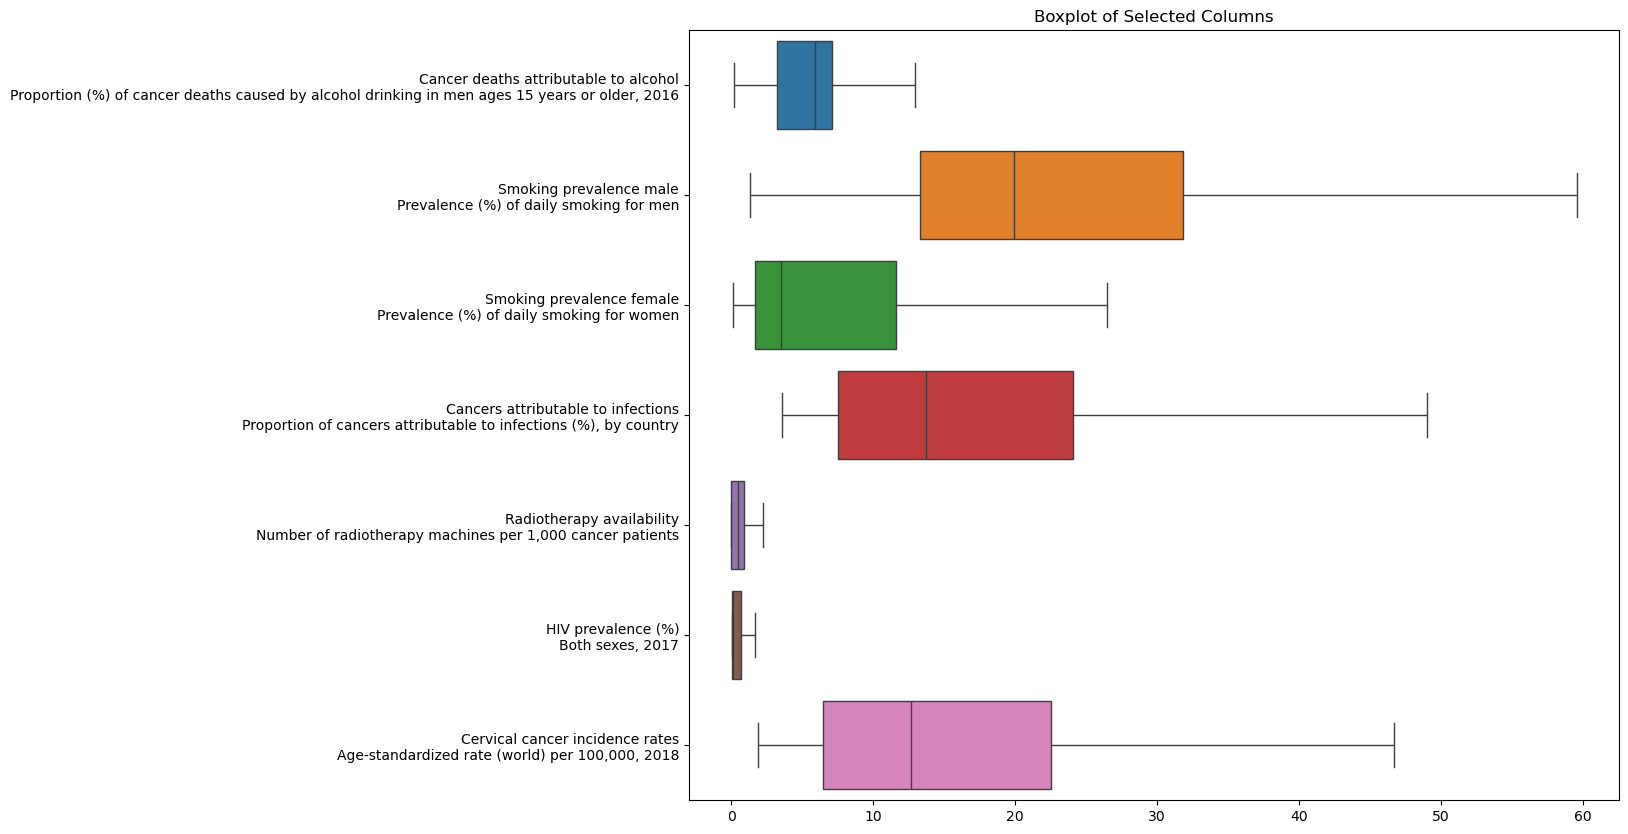

In [73]:
# Boxplot to visualize the outliers
plt.figure(figsize=(12, 10))
sns.boxplot(data=selected_data, orient='h')
plt.title('Boxplot of Selected Columns')
plt.show()

In [69]:
def cap_outliers(df):
    for column in df.select_dtypes(include=['float', 'int']).columns:
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Cap the outliers
        df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

# Apply the function
selected_data_capped = cap_outliers(selected_data)

print("Outliers capped. Data shape:", selected_data_capped.shape)


Outliers capped. Data shape: (207, 7)


##### Explanatory data analysis

In [77]:
# Description of the dataset
selected_data_capped.describe()

,"Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016",Smoking prevalence male\nPrevalence (%) of daily smoking for men,Smoking prevalence female\nPrevalence (%) of daily smoking for women,"Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country","Radiotherapy availability\nNumber of radiotherapy machines per 1,000 cancer patients","HIV prevalence (%)\nBoth sexes, 2017","Cervical cancer incidence rates\nAge-standardized rate (world) per 100,000, 2018"
count,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000,207.000000
mean,5.429227,22.980435,6.618357,17.280193,0.551932,0.479469,16.473430
std,2.786702,11.572012,6.785302,12.151265,0.551677,0.600855,12.077469
min,0.200000,1.300000,0.100000,3.600000,0.000000,0.050000,1.900000
25%,3.200000,13.300000,1.700000,7.500000,0.000000,0.050000,6.450000
50%,5.900000,19.900000,3.500000,13.700000,0.490000,0.100000,12.700000
75%,7.100000,31.800000,11.600000,24.100000,0.910000,0.700000,22.550000
max,12.950000,59.550000,26.450000,49.000000,2.275000,1.675000,46.700000


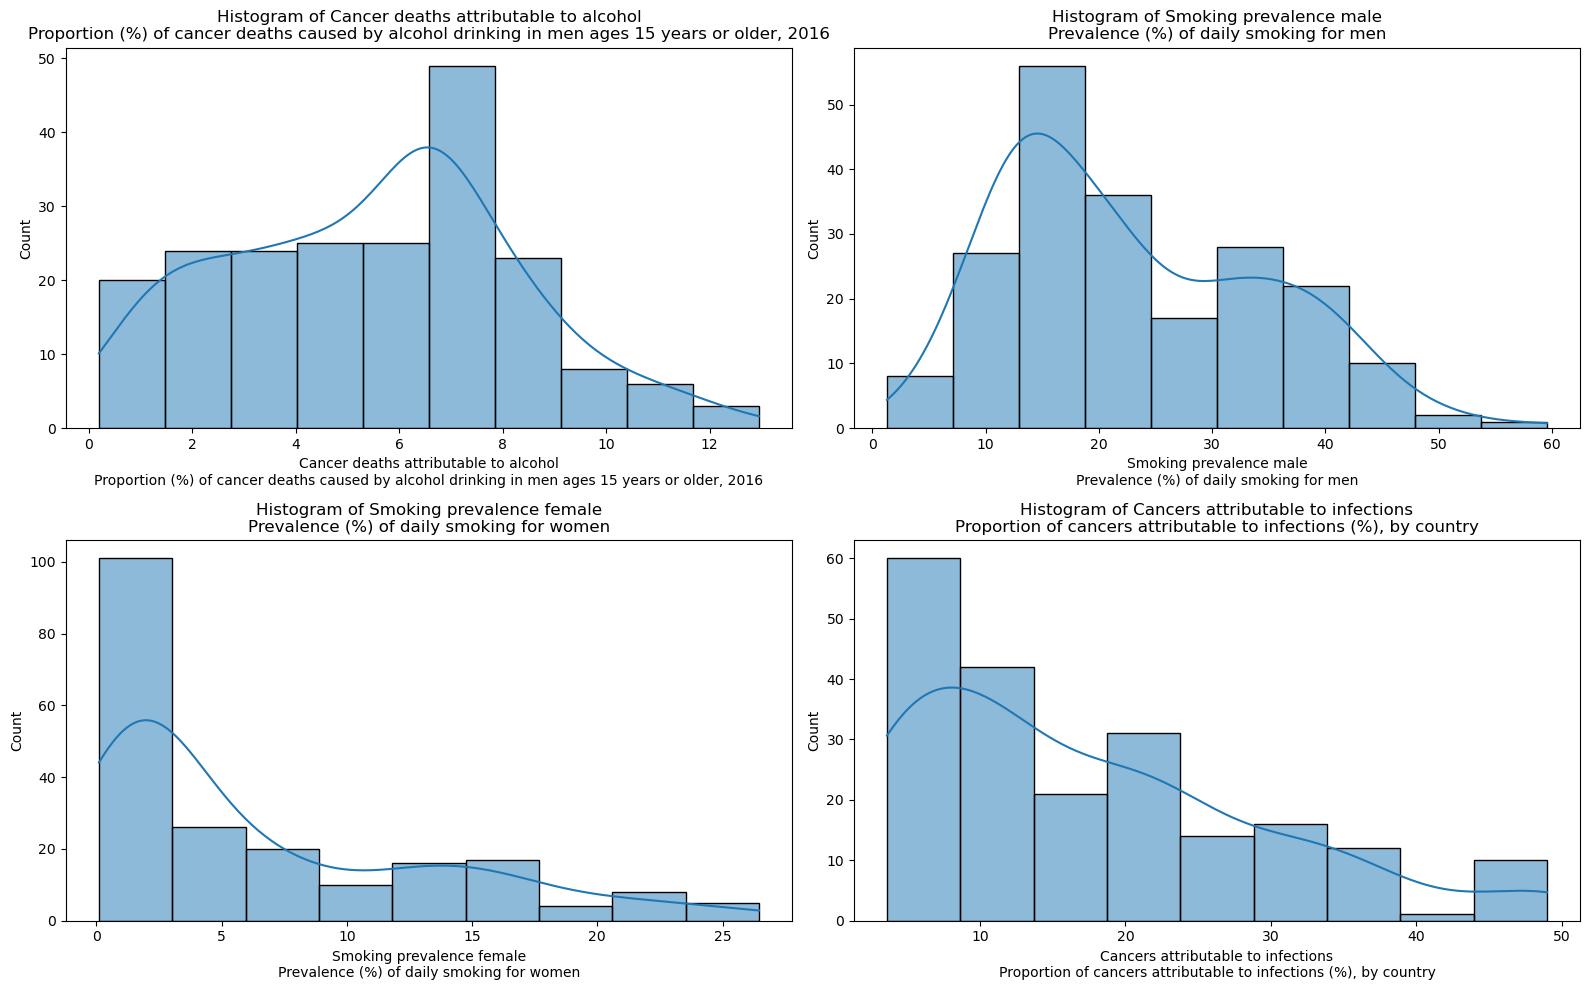

In [83]:
# Plot histograms for each numeric column
numeric_columns = selected_data_capped.columns
plt.figure(figsize=(16, 10))
for i, column in enumerate(numeric_columns, 1):
    if i <= 4:  # Plot only first 4 pairwise histograms
        plt.subplot(2, 2, i)
        sns.histplot(selected_data_capped[column], kde=True)
        plt.title(f'Histogram of {column}')
plt.tight_layout()
plt.show()

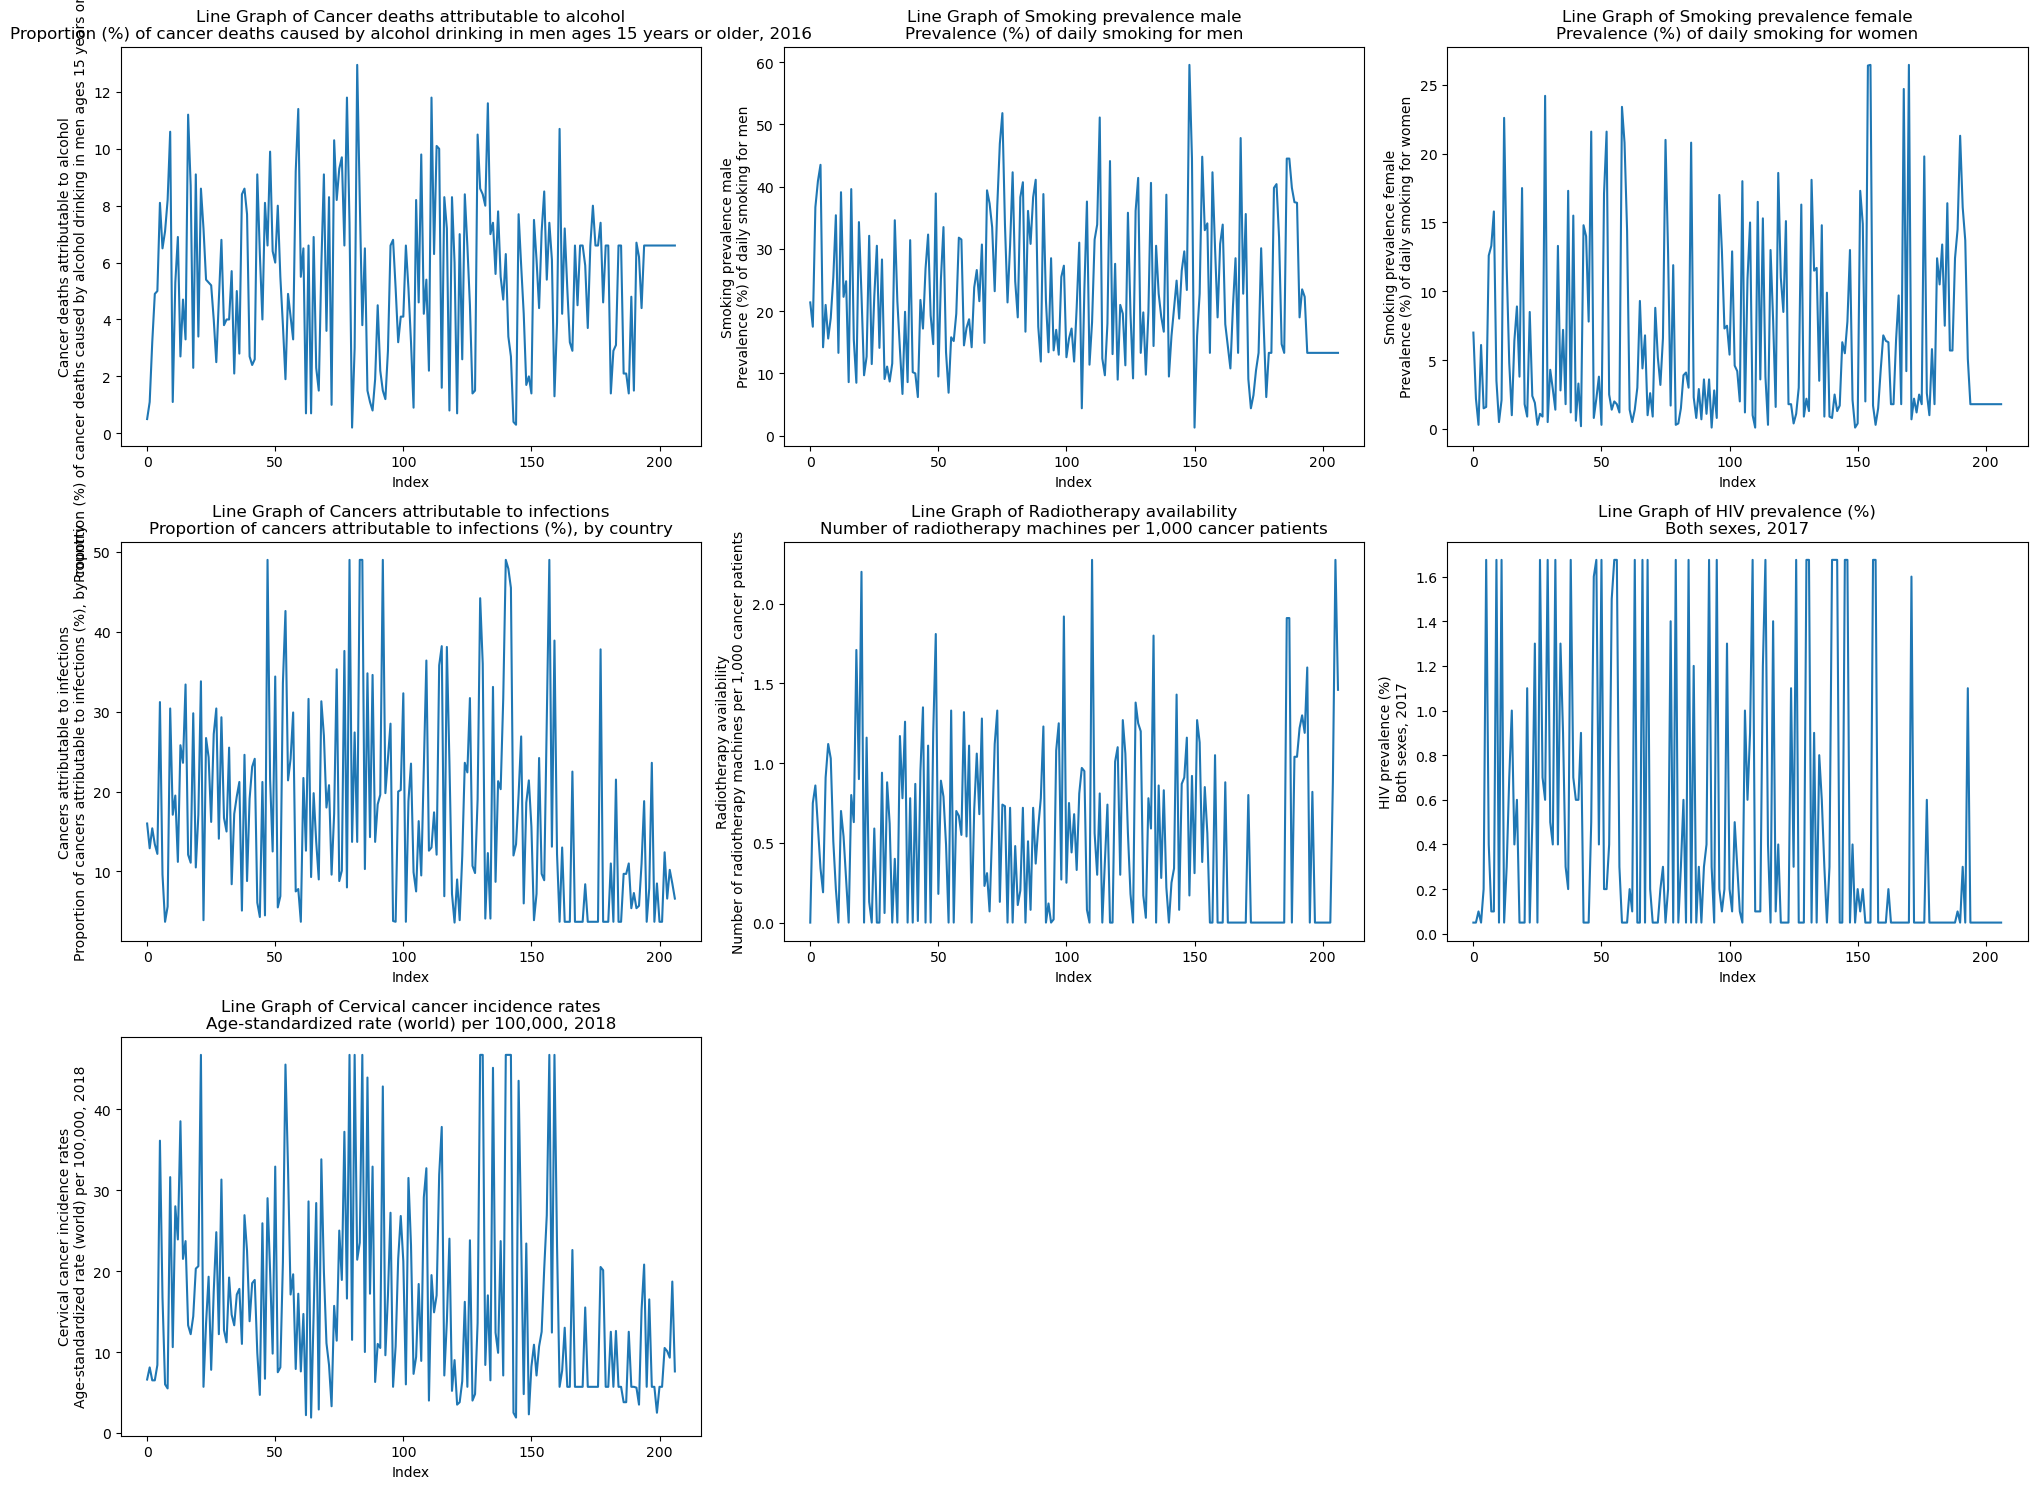

In [91]:
# Plot line graphs for each numeric column after removing outliers
plt.figure(figsize=(20, 15))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    plt.plot(selected_data_capped[column])
    plt.title(f'Line Graph of {column}')
    plt.xlabel('Index')
    plt.ylabel(column)
plt.tight_layout()
plt.show()

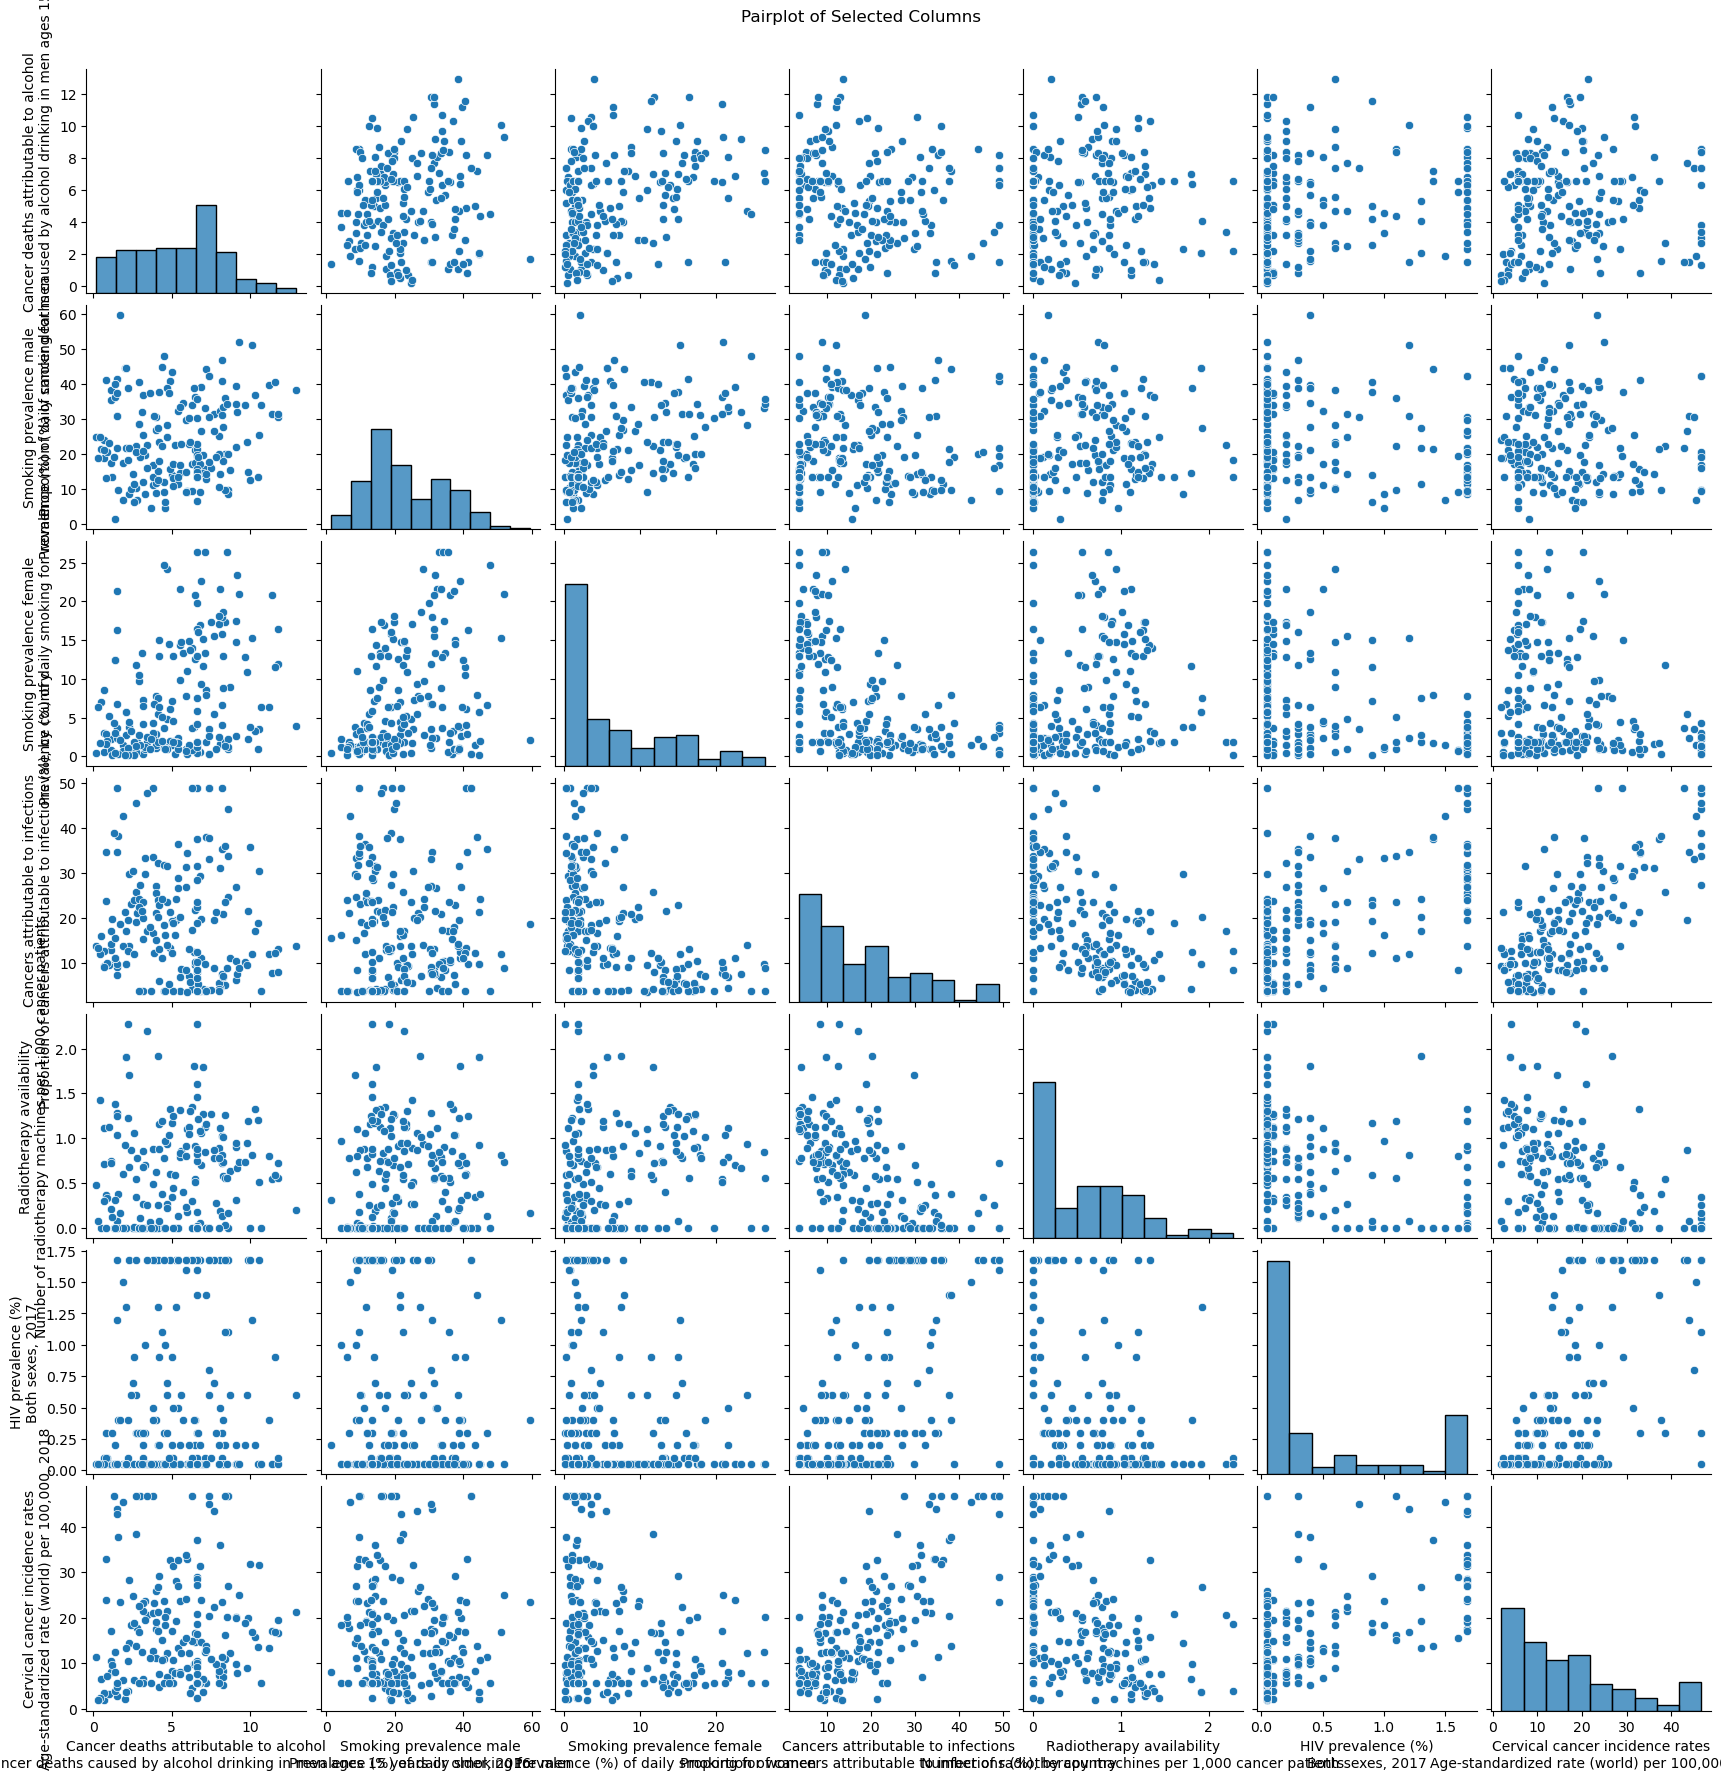

In [74]:
# pairplot to visualize the relationships between the selected columns
sns.pairplot(selected_data_capped)
plt.suptitle('Pairplot of Selected Columns', y=1.02)
plt.show()

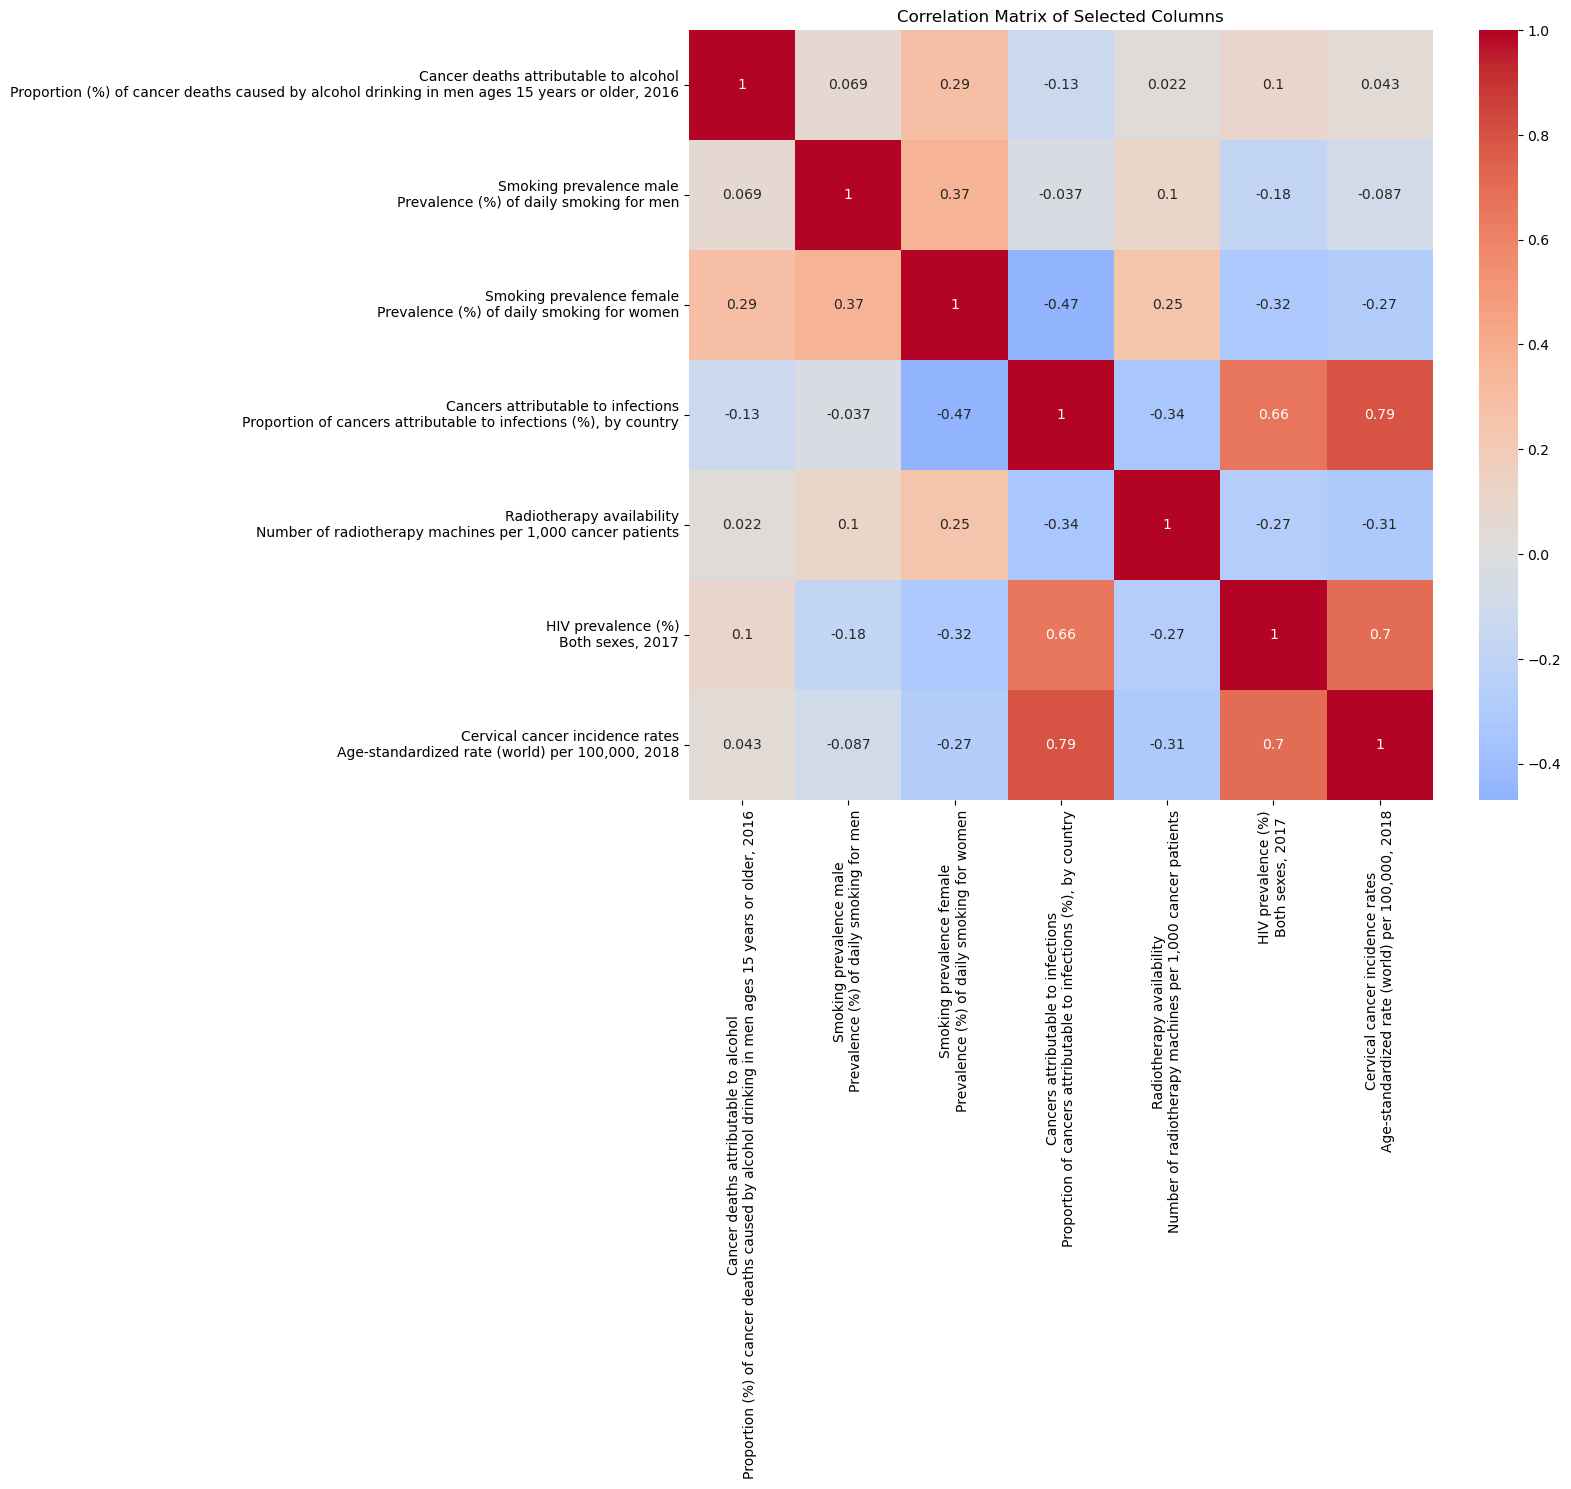

In [92]:
# Correlation matrix to visualize the relationships between the selected columns
plt.figure(figsize=(12, 10))
correlation_matrix = selected_data_capped.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Selected Columns') 
plt.show()

##### Key Takeaways from the Correlation Matrix:
##### Color Interpretation:                                                                                         Red/Orange: Positive correlation (as one variable increases, the other tends to increase).Blue: Negative correlation (as one variable increases, the other tends to decrease).Intensity: Darker colors represent stronger correlations, while lighter colors represent weaker correlations.      
 ##### Significant Correlations:                                                                                       Cancers Attributable to Infections & Cervical Cancer Incidence:There is a strong positive correlation (0.79), indicating that higher rates of infection-related cancers are associated with higher rates of cervical cancer.      Smoking Prevalence (Female) & Cancers Attributable to Infections: There's a moderate positive correlation (0.66), suggesting that higher female smoking rates are linked to increased infection-related cancers.                      HIV Prevalence & Cervical Cancer Incidence: There is also a moderate positive correlation (0.70), implying that higher HIV prevalence rates are associated with increased cervical cancer rates.                                            Low or Negative Correlations:                                                                              Alcohol-related Cancer Deaths & Other Variables: Generally low or no correlation, indicating that alcohol-related cancer deaths may not be closely associated with other factors in this dataset.                                     Radiotherapy Availability: It has a slight negative correlation with cervical cancer incidence and infection-related cancers, suggesting that increased radiotherapy access may be linked to lower rates of these cancers.
##### Overall Insights                                                                                         High-risk factors: Female smoking prevalence, infections, and HIV are closely linked to increased cervical cancer rates.                                                                                                           Policy Implications: The findings can guide interventions focused on reducing infection rates and addressing smoking prevalence to lower cancer risks.

##### Machine Learning

In [93]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [94]:
# Define the features (independent variables)
X = selected_data_capped[[
    'HIV prevalence (%)\nBoth sexes, 2017',
    'Cancer deaths attributable to alcohol\nProportion (%) of cancer deaths caused by alcohol drinking in men ages 15 years or older, 2016',
    'Smoking prevalence male\nPrevalence (%) of daily smoking for men',
    'Smoking prevalence female\nPrevalence (%) of daily smoking for women',
    'Cancers attributable to infections\nProportion of cancers attributable to infections (%), by country',
    'Radiotherapy availability\nNumber of radiotherapy machines per 1,000 cancer patients'
]]

# Define the target variable
y = selected_data_capped['Cervical cancer incidence rates\nAge-standardized rate (world) per 100,000, 2018']


In [95]:
# Splitting the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [96]:
# Initialize the model
model = LinearRegression()

# Train the model using the training data
model.fit(X_train, y_train)


LinearRegression()

In [97]:
# Predict on the testing data
y_pred = model.predict(X_test)


In [98]:
# Calculate Mean Squared Error (MSE) and R-squared value
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Value: {r2}")


Mean Squared Error: 43.12784340346192
R-squared Value: 0.6532866912580466


In [99]:
# Displaying the coefficients of the regression model
coefficients = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
})

print(coefficients)


                                             Feature  Coefficient
0               HIV prevalence (%)\nBoth sexes, 2017     4.867153
1  Cancer deaths attributable to alcohol\nProport...     0.288278
2  Smoking prevalence male\nPrevalence (%) of dai...    -0.127317
3  Smoking prevalence female\nPrevalence (%) of d...     0.280985
4  Cancers attributable to infections\nProportion...     0.702299
5  Radiotherapy availability\nNumber of radiother...    -0.809761


##### Key Observations:
##### Mean Squared Error (MSE): The value of around 43.13 indicates the average squared difference between the predicted and actual values of cervical cancer incidence rates. A lower MSE would imply a better fit, but it's still useful to compare this to the variability in the dataset.
##### R-squared Value: At approximately 0.65, this suggests that the model explains about 65% of the variance in cervical cancer incidence rates, which is fairly strong. It indicates that the chosen factors have a significant impact on predicting the rates.
##### Coefficient Analysis:
##### The coefficients indicate the relationship between each predictor and the target variable:

##### Positive Coefficients: Variables with positive coefficients (e.g., 'HIV prevalence', 'Cancer deaths attributable to infections') increase cervical cancer incidence rates.
##### Negative Coefficients: Variables with negative coefficients (e.g., 'Radiotherapy availability') have a reducing effect on incidence rates, as expected.
##### Insights and Recommendations:
##### HIV Prevalence: It has the largest positive coefficient, suggesting a strong impact on increasing cervical cancer rates. This aligns with the known link between HIV and cervical cancer.
##### Infection-Related Cancers: Another significant positive factor, emphasizing the importance of addressing infections to lower cancer incidence.
##### Radiotherapy Availability: As expected, better healthcare availability (more radiotherapy machines) correlates with lower cervical cancer rates.

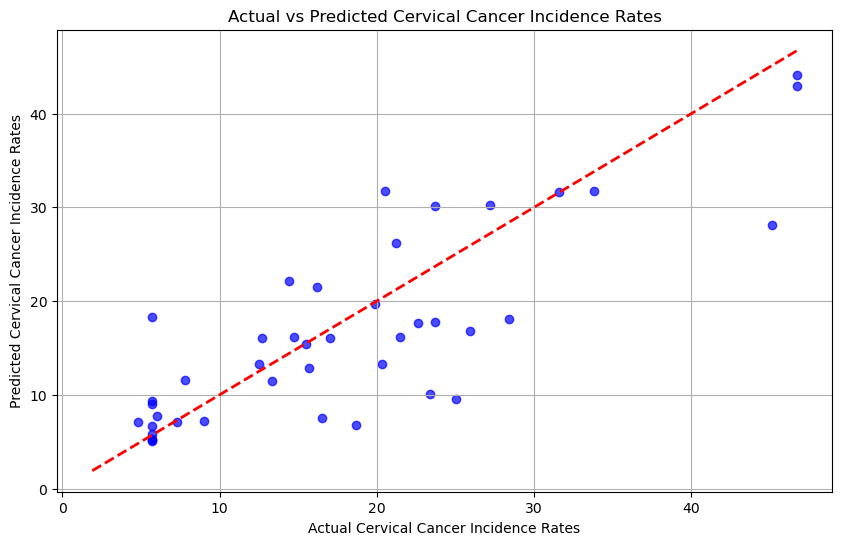

C:\Users\Darlene Wendy\AppData\Local\Temp\ipykernel_13260\861687986.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')


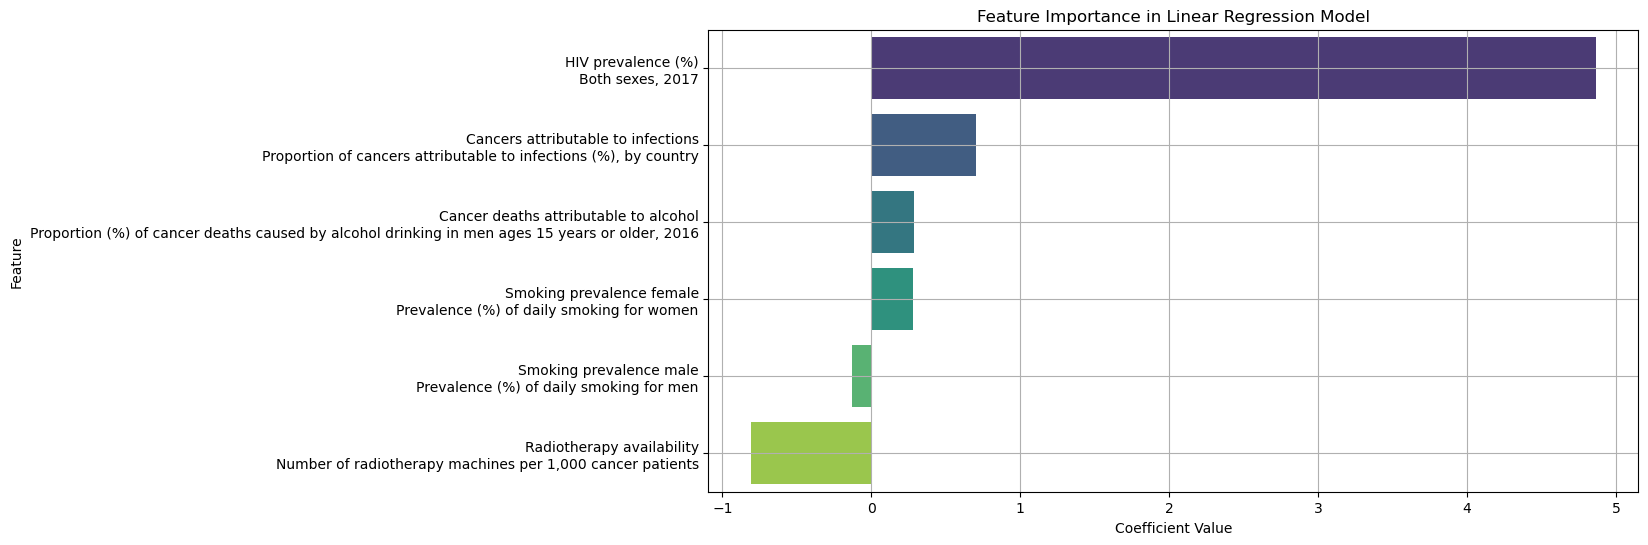

Text(0, 0.5, 'Residuals')

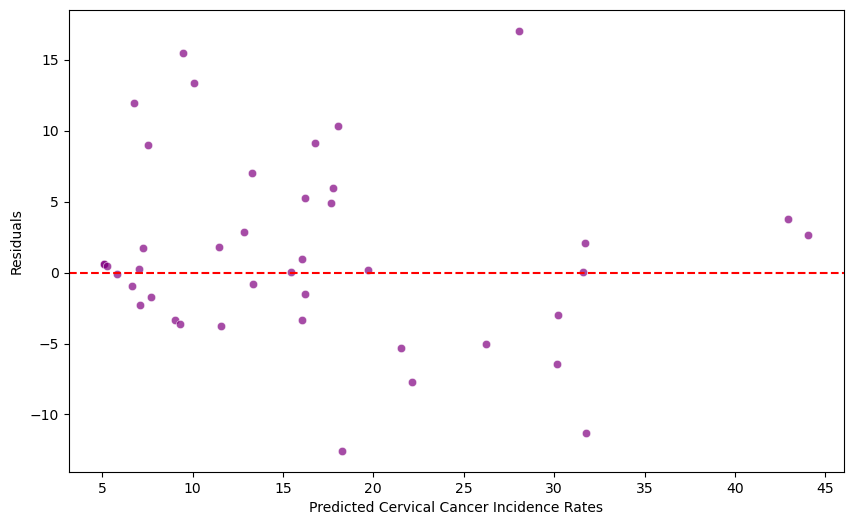

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Scatter Plot of Actual vs Predicted Cervical Cancer Rates
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='b')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Actual Cervical Cancer Incidence Rates')
plt.ylabel('Predicted Cervical Cancer Incidence Rates')
plt.title('Actual vs Predicted Cervical Cancer Incidence Rates')
plt.grid(True)
plt.show()

# 2. Bar Plot for Feature Coefficients
plt.figure(figsize=(12, 6))
coefficients.sort_values(by='Coefficient', ascending=False, inplace=True)
sns.barplot(x='Coefficient', y='Feature', data=coefficients, palette='viridis')
plt.title('Feature Importance in Linear Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.grid(True)
plt.show()

# 3. Residual Plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, color='purple', alpha=0.7)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Cervical Cancer Incidence Rates')
plt.ylabel('Residuals')


##### Scatter plot: Many data points are close to the red line, indicating good predictions by the model. The plot shows a positive correlation between actual and predicted rates, suggesting that the model has captured the overall trend effectively. There are a few outliers, where predictions deviate significantly from actual values, indicating that the model may not have captured all the variance in those cases.

##### This bar plot illustrates the impact of each feature on predicting cervical cancer incidence rates, based on the coefficients from the linear regression model:

##### Key Insights:
##### HIV Prevalence:

##### The most significant positive contributor to cervical cancer rates.
##### Its high coefficient suggests a strong association, emphasizing the need for targeted interventions in regions with higher HIV prevalence.
##### Cancers Attributable to Infections:

##### Another significant positive factor, aligning with the known relationship between infections (e.g., HPV) and increased cancer risks, especially cervical cancer.
##### Radiotherapy Availability:

##### It has a negative coefficient, indicating that better access to radiotherapy correlates with lower cervical cancer incidence rates, which is expected due to improved cancer management and treatment.
##### Other Factors (e.g., smoking, alcohol):

##### They have smaller coefficients, but they still contribute to the overall prediction of cervical cancer rates, albeit less strongly than the top factors.

##### The residuals are spread both above and below the red dashed line (representing zero error), indicating that the model does not exhibit a clear bias toward over- or under-prediction. The residuals are fairly centered around zero, suggesting a decent fit by the linear regression model.

##### Random forest Regressor

In [102]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [105]:
# Step 1: Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Step 2: Train the model using the training data
rf_model.fit(X_train, y_train)

# Step 3: Make predictions on the testing data
y_rf_pred = rf_model.predict(X_test)  # Ensure this line is executed


In [106]:
# Calculate Mean Squared Error (MSE) and R-squared value
rf_mse = mean_squared_error(y_test, y_rf_pred)
rf_r2 = r2_score(y_test, y_rf_pred)

print(f"Random Forest Mean Squared Error: {rf_mse}")
print(f"Random Forest R-squared Value: {rf_r2}")


Random Forest Mean Squared Error: 47.03708940476192
Random Forest R-squared Value: 0.621859485331766


C:\Users\Darlene Wendy\AppData\Local\Temp\ipykernel_13260\3523522084.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')


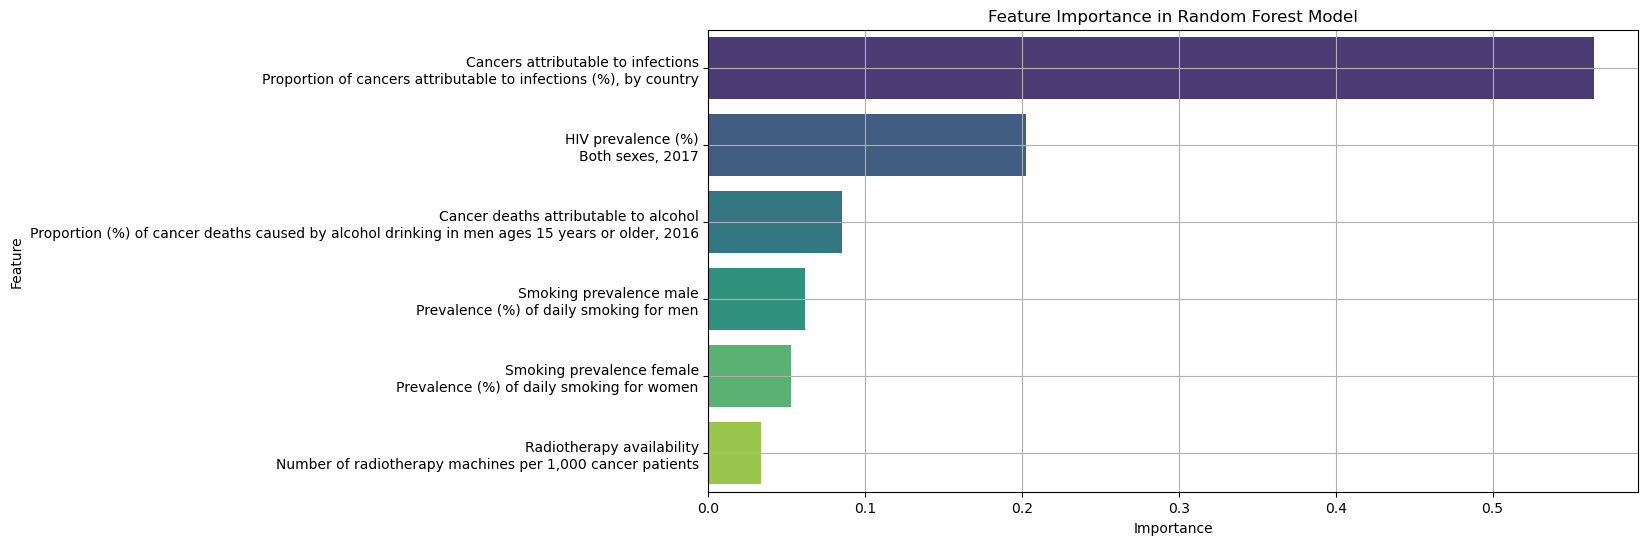

In [107]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract feature importances from the model
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
})

# Sort features by importance
feature_importances.sort_values(by='Importance', ascending=False, inplace=True)

# Plot the feature importances
plt.figure(figsize=(12, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importances, palette='viridis')
plt.title('Feature Importance in Random Forest Model')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.grid(True)
plt.show()


##### Key Insights:
##### Cancers Attributable to Infections:

##### It is the most important feature in the Random Forest model, indicating that infections have the strongest impact on cervical cancer incidence rates.
##### HIV Prevalence:

##### The second most important factor, reinforcing its significant contribution to cervical cancer rates. 
##### Cancer Deaths Attributable to Alcohol:

##### This factor also plays a considerable role, suggesting that alcohol consumption is a notable risk factor.
##### Smoking Prevalence (Male and Female):

##### Both smoking rates contribute to the predictions but to a lesser extent than infections and HIV prevalence.
##### Radiotherapy Availability:

##### While it still has some influence, its lower importance in this model suggests that healthcare infrastructure might have a more indirect relationship with overall incidence rates.

##### The lower MSE for the linear regression model suggests that it has a slightly better average error in predicting cervical cancer rates compared to the Random Forest model.
##### The linear regression model explains approximately 65.3% of the variance in the data, while the Random Forest model explains around 62.2%. This indicates that linear regression has a slightly better fit for this dataset.